In [1]:
import sys
sys.path.append('./paralel_planarity_criterion')

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import random
import planarity_criterion as pc 
import printers as printers
import numpy as np

planarity_crit = pc.PlanarityCriterion()
printer = printers.Printer()
tcc_printer = printers.ConnectedComponentsDrawer()

In [3]:
# 🎲 Generate a random seed  ### interesting seeds: 3244861328
seed = random.randint(0, 2**32 - 1)
print("Using seed:", seed)

# 🌱 Seed NumPy’s RNG
np.random.seed(seed)

Using seed: 863812151


Seed:  1966


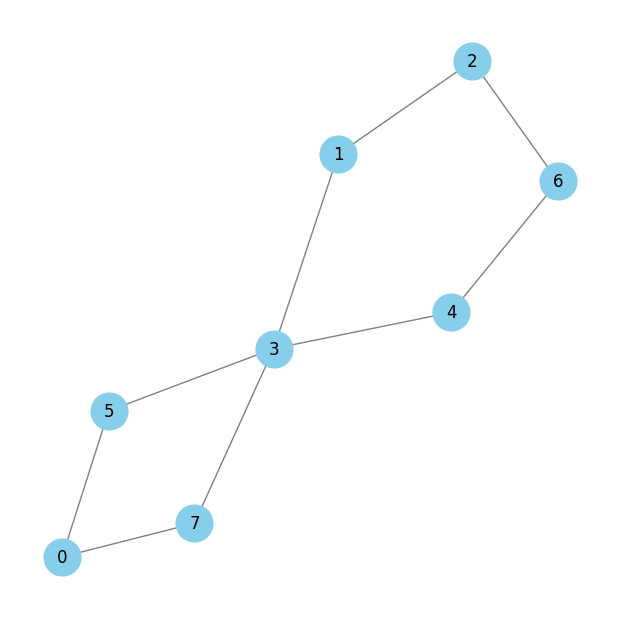

In [4]:
### CREATE A RANDOM GRAPH G ###


# Generate a random seed first
seed_value = 1966#random.randint(0, 10000)  # Random seed between 0 and 10000
random.seed(seed_value)
print("Seed: ", seed_value)

# Parameters
n = 8 # Number of nodes
p = 0.4 # Probability of edge creation

# Generate a random connected Erdős-Rényi graph
G = nx.erdos_renyi_graph(n, p)
while not nx.is_connected(G):
    G = nx.erdos_renyi_graph(n, p)


# Draw the graph
plt.figure(figsize=(6, 6))
nx.draw(G, with_labels=True, node_color='skyblue', node_size=700, edge_color='gray')
plt.show()

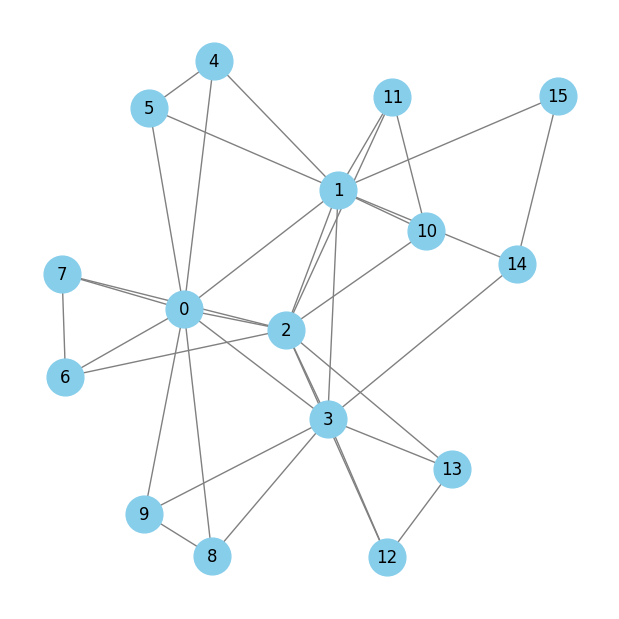

In [5]:
# TAKE GRAPH FROM EXAMPLES
import graph_examples as examples

graph_examples = examples.GraphExamples.get_examples()
G = graph_examples[10]

# Draw the graph
plt.figure(figsize=(6, 6))
nx.draw(G, with_labels=True, node_color='skyblue', node_size=700, edge_color='gray')
plt.show()

In [6]:
planar, info = planarity_crit.is_planar(G)
print("Correct result: ", nx.is_planar(G) == planar)

Correct result:  True


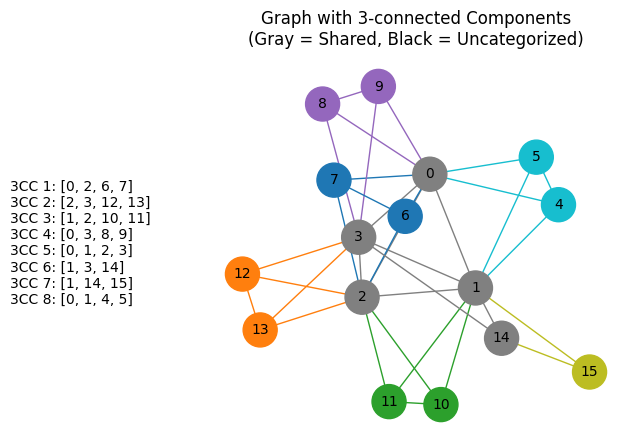

8


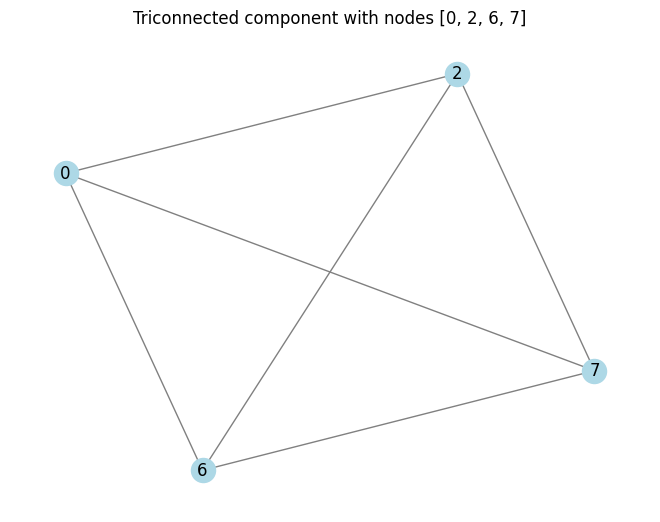

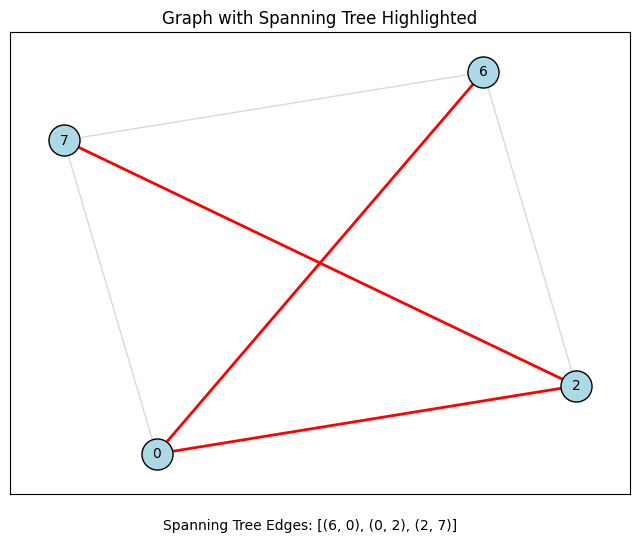

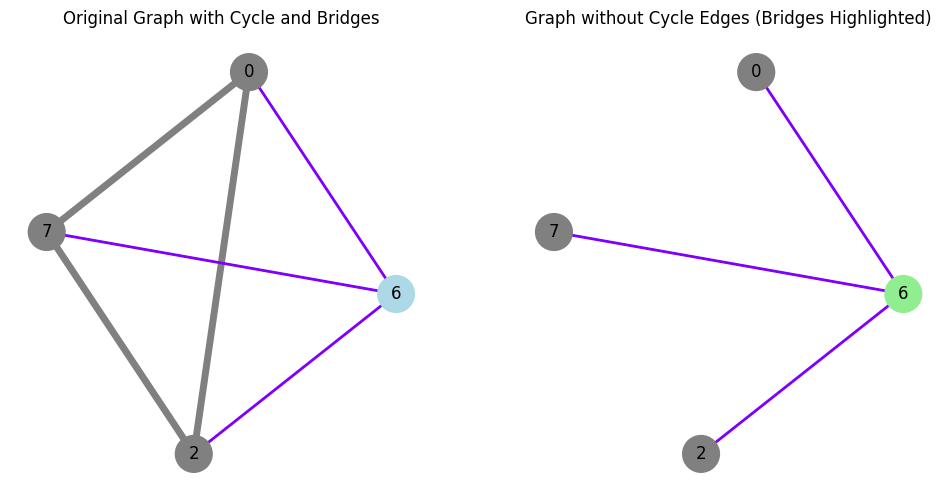

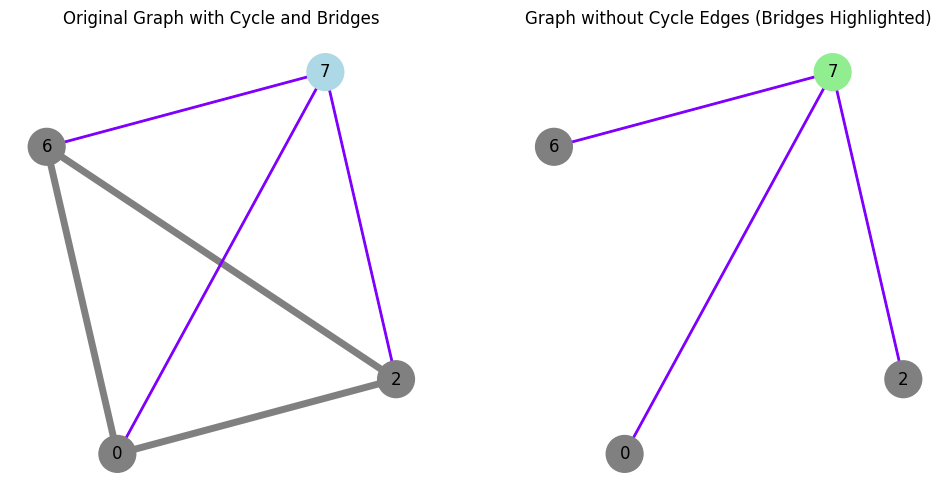

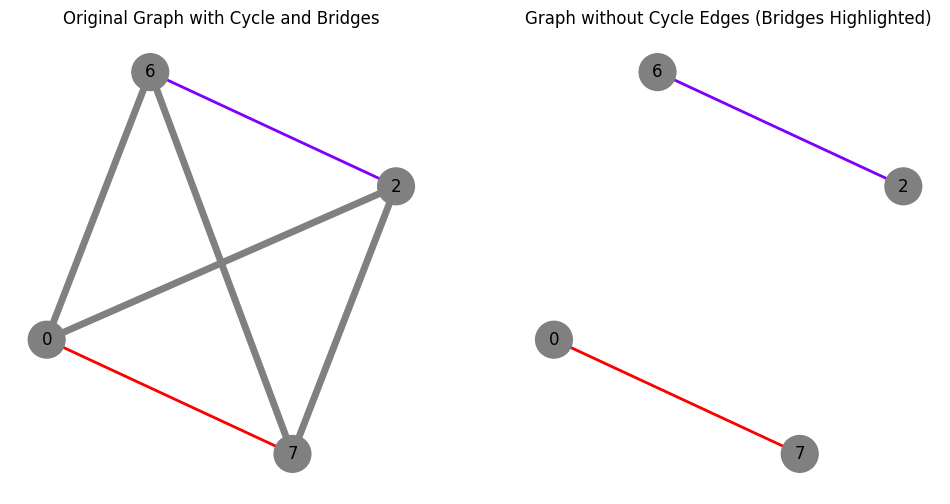

--------------------------------------------------------------------------------------------------------------------------------------------


8


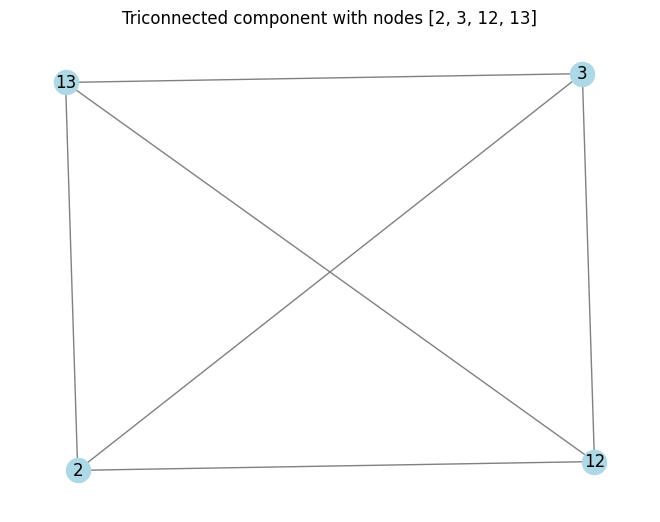

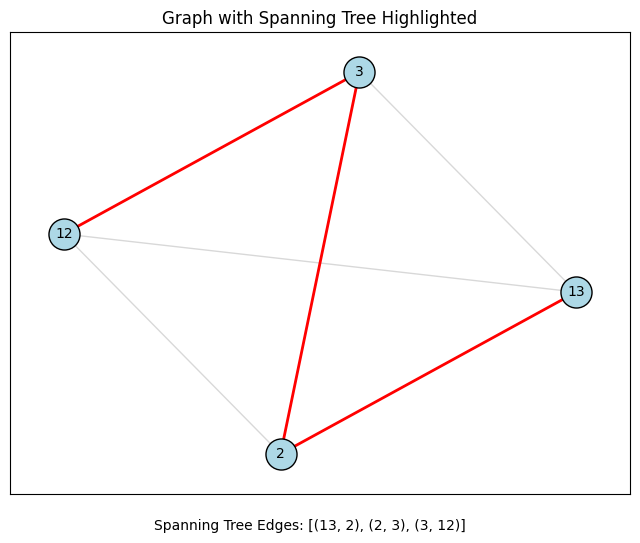

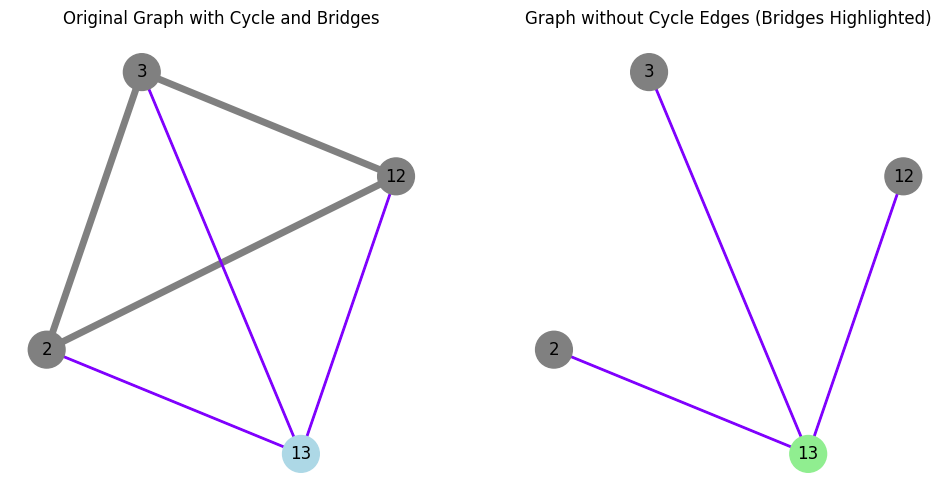

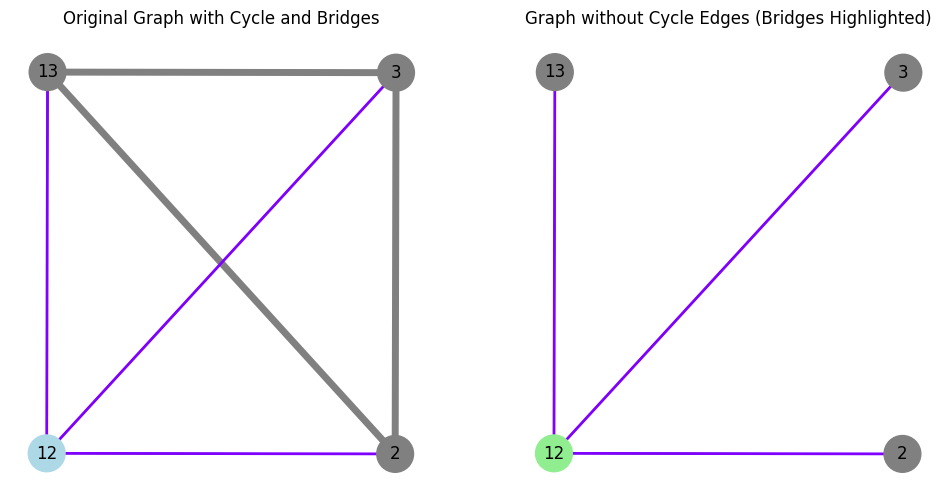

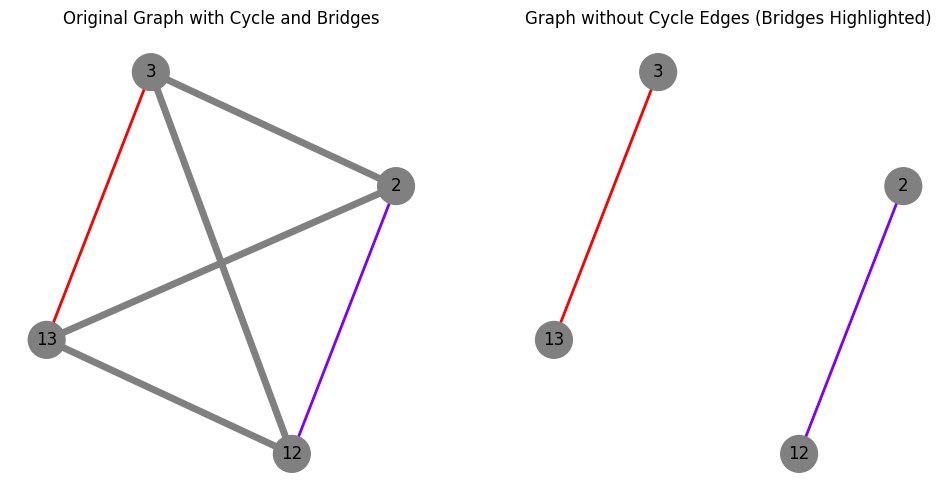

--------------------------------------------------------------------------------------------------------------------------------------------


8


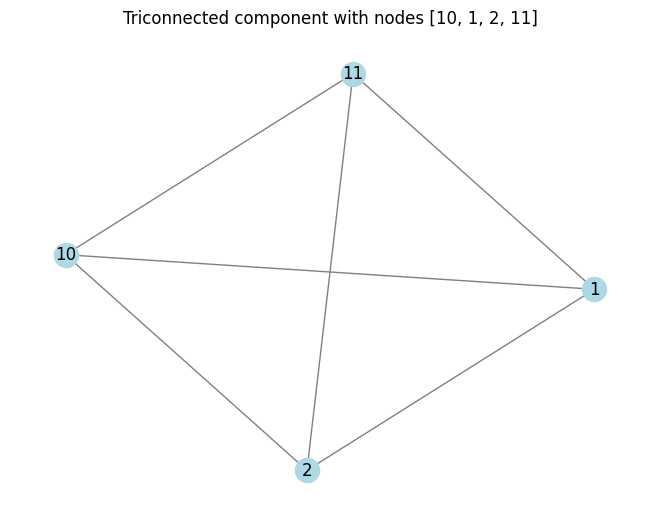

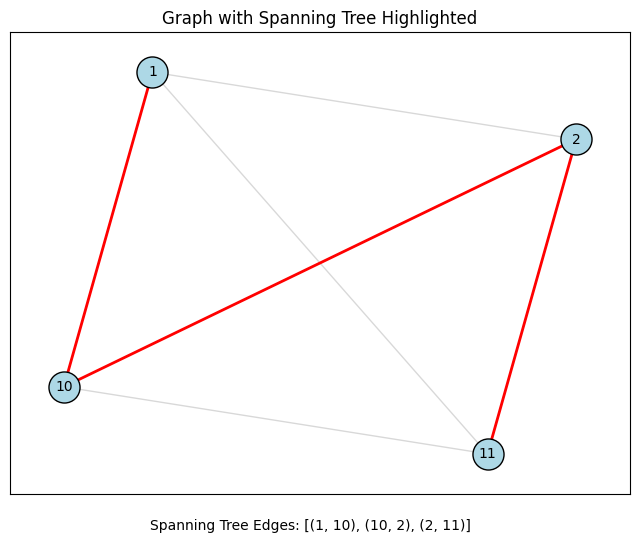

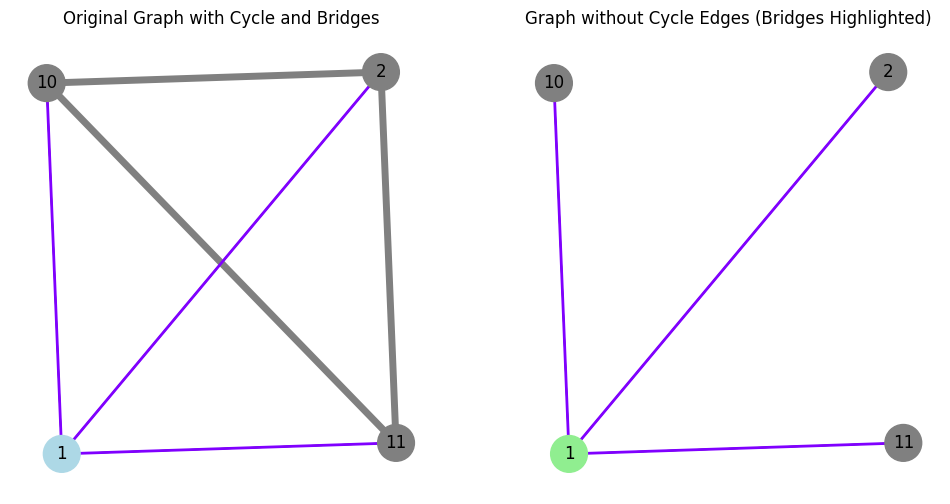

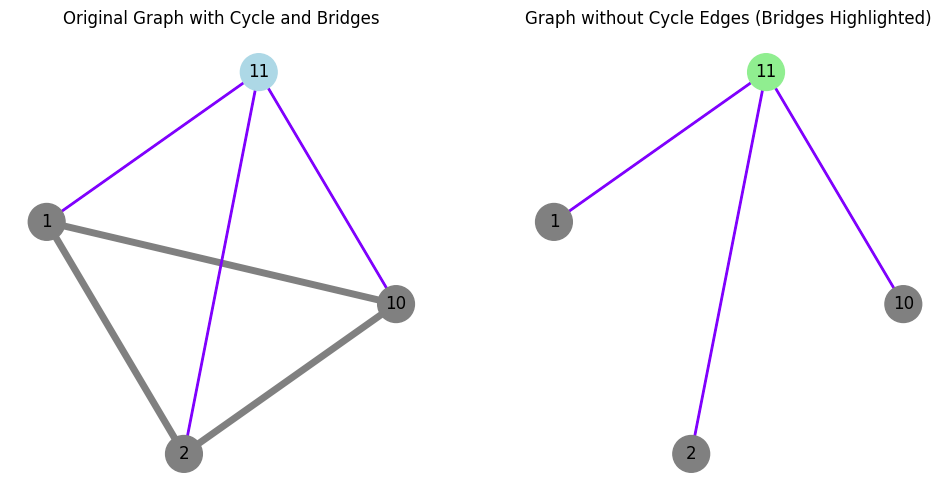

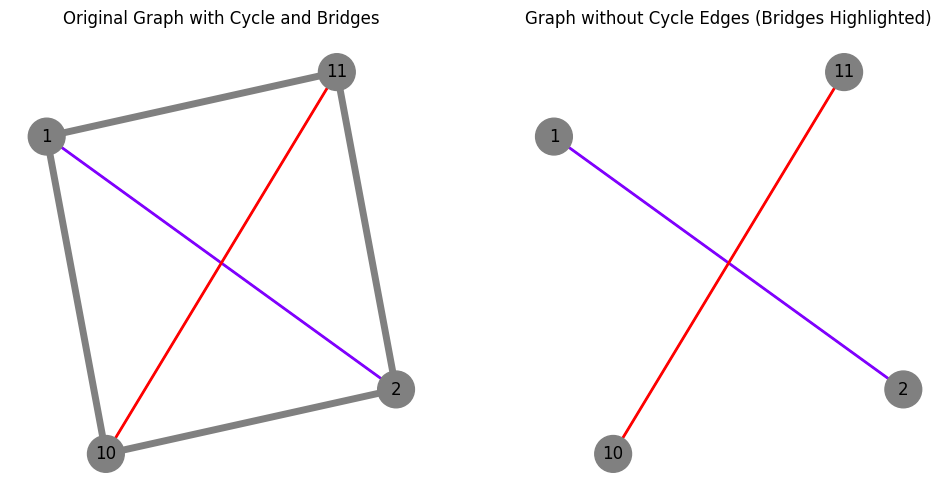

--------------------------------------------------------------------------------------------------------------------------------------------


8


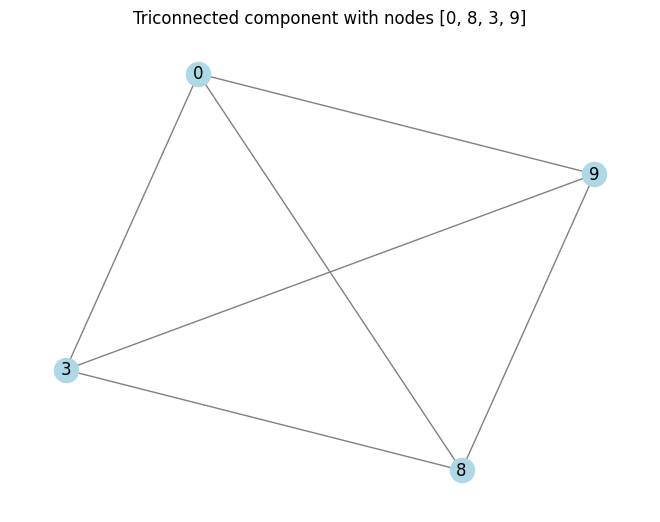

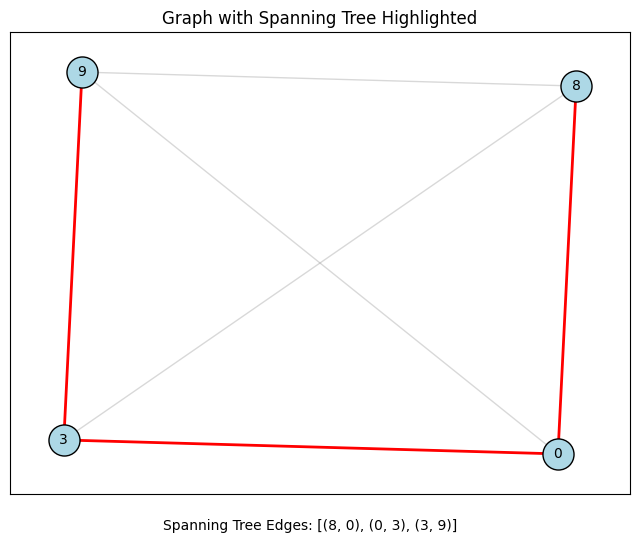

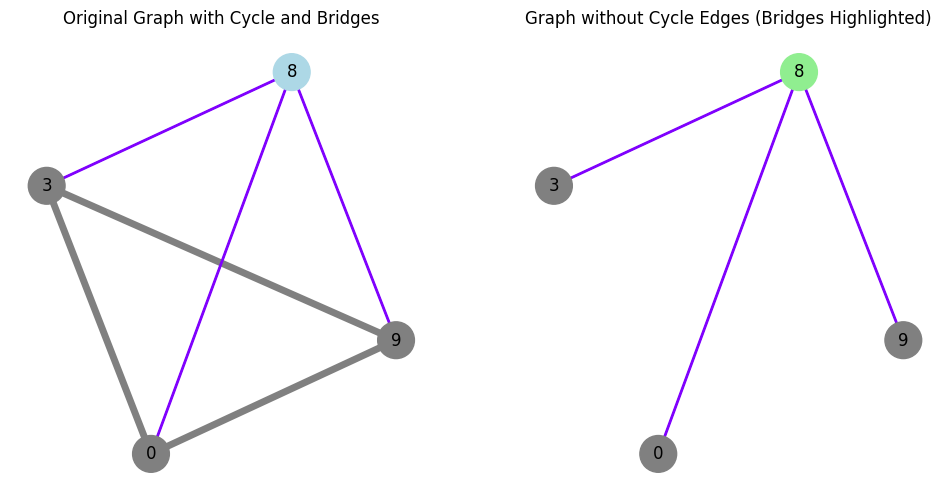

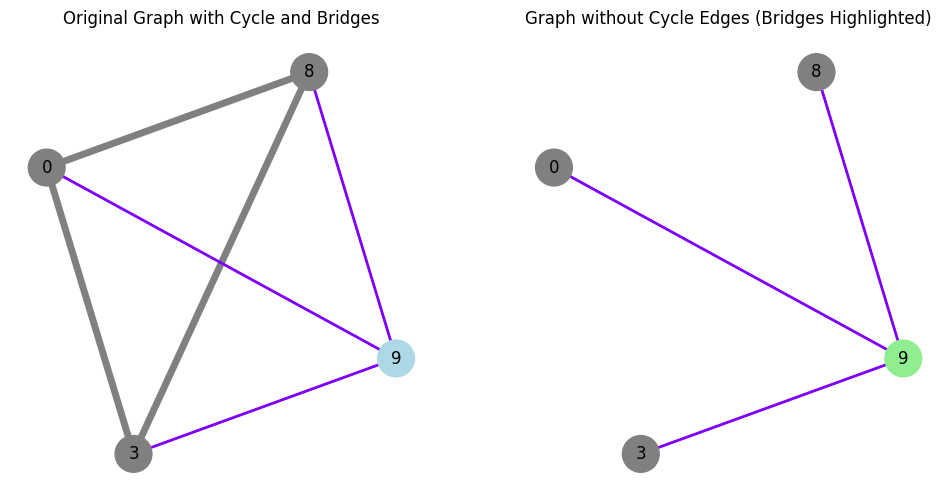

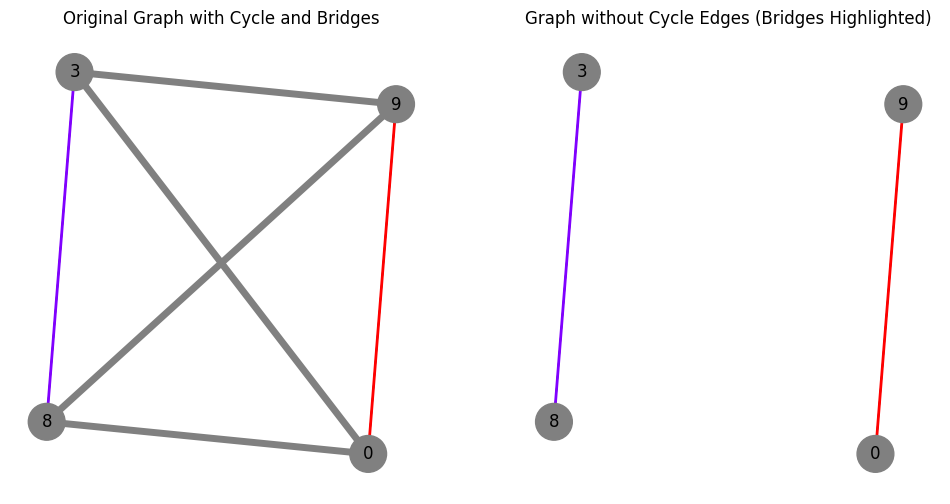

--------------------------------------------------------------------------------------------------------------------------------------------


8


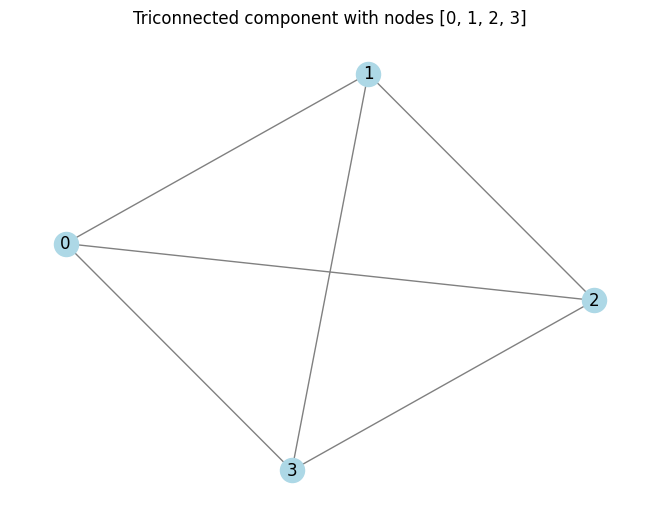

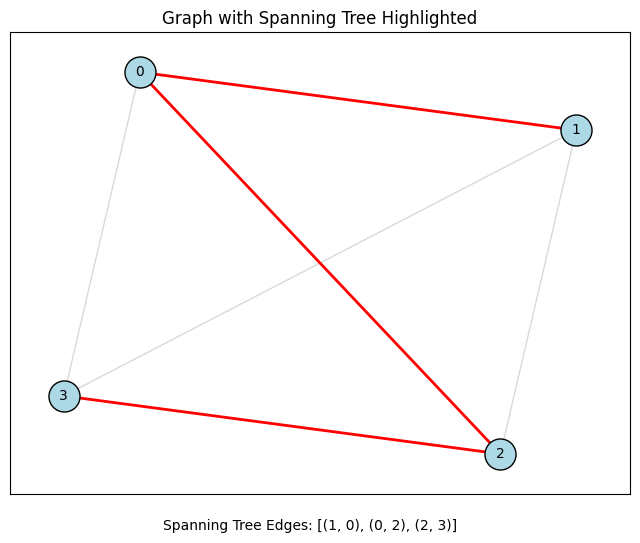

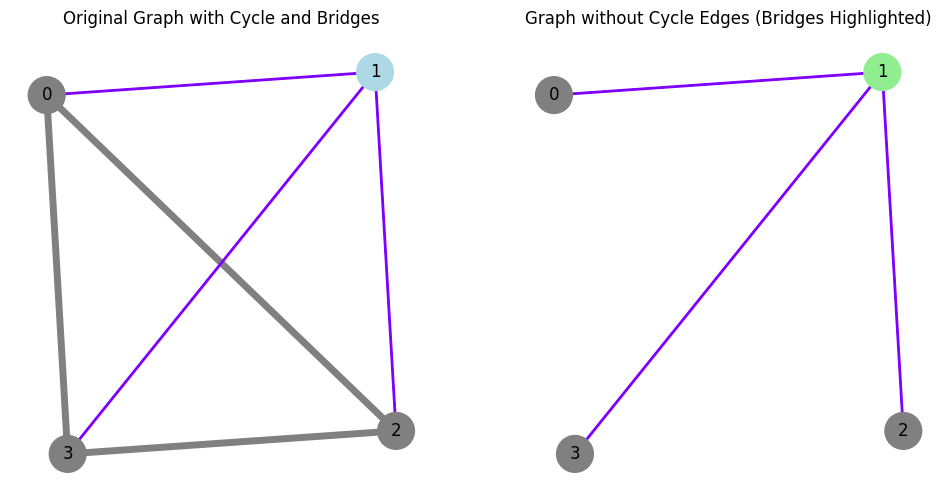

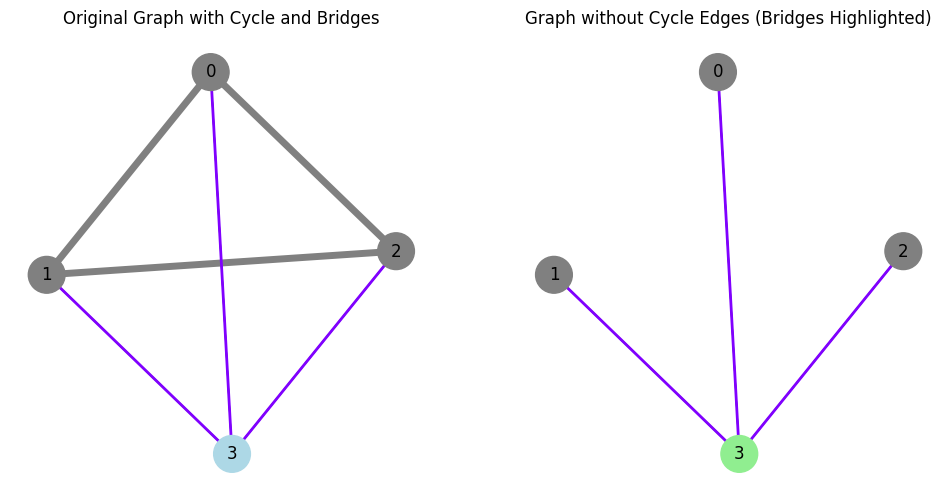

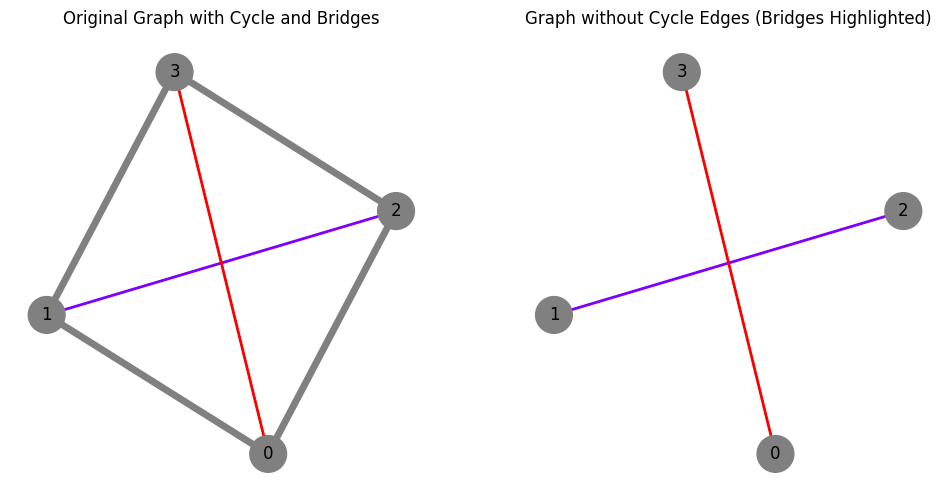

--------------------------------------------------------------------------------------------------------------------------------------------


8


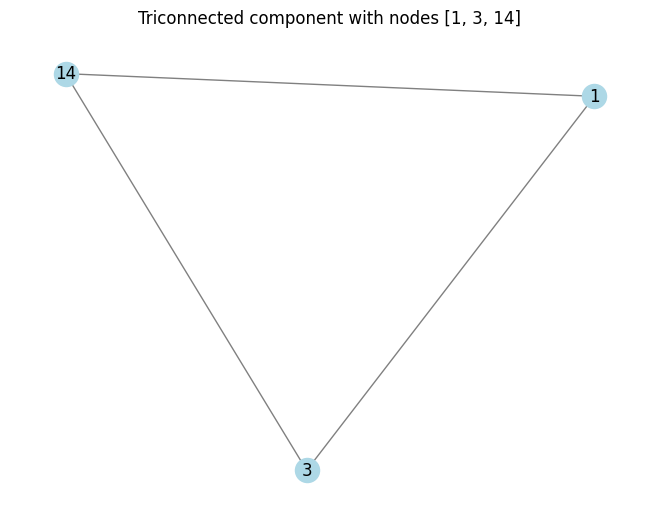

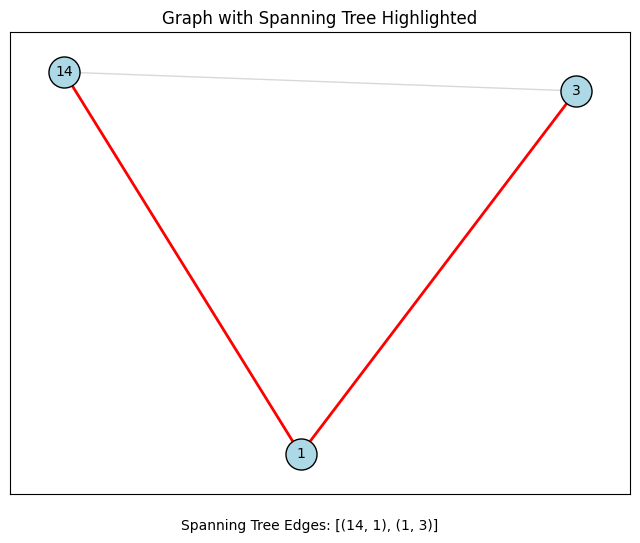

No bridges found for cycle: [3, 1, 14, 3]
--------------------------------------------------------------------------------------------------------------------------------------------


8


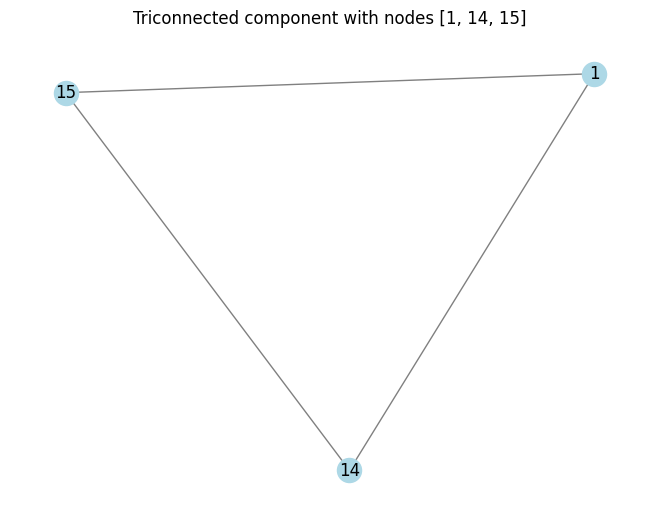

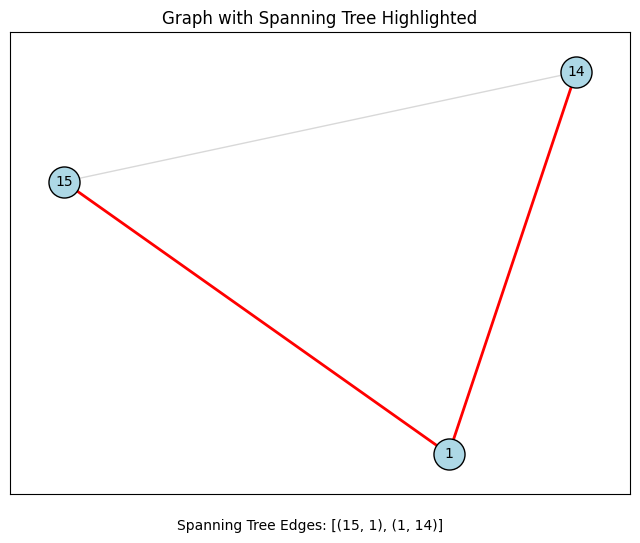

No bridges found for cycle: [14, 1, 15, 14]
--------------------------------------------------------------------------------------------------------------------------------------------


8


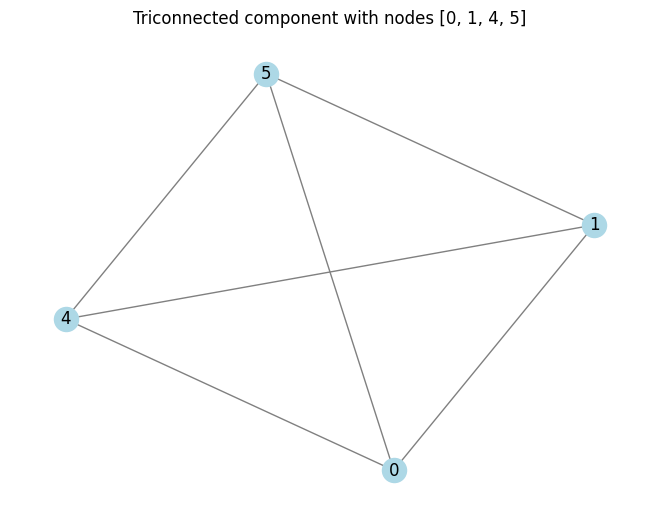

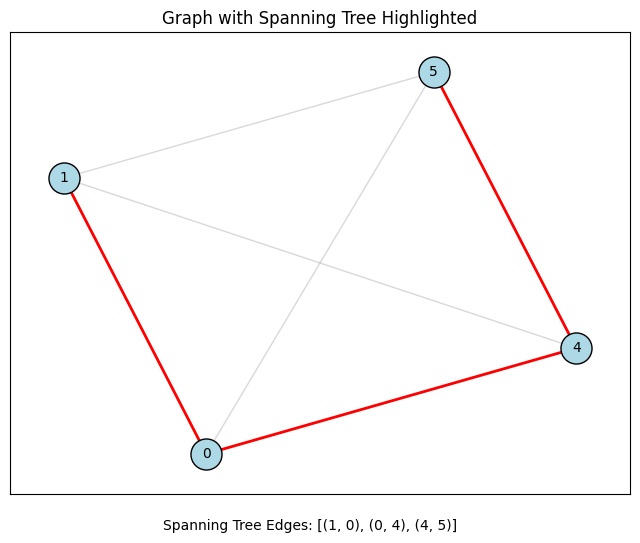

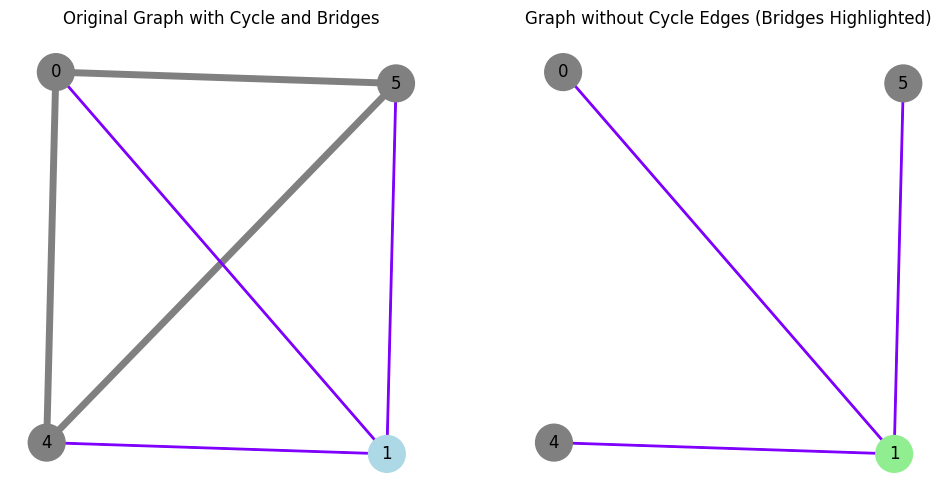

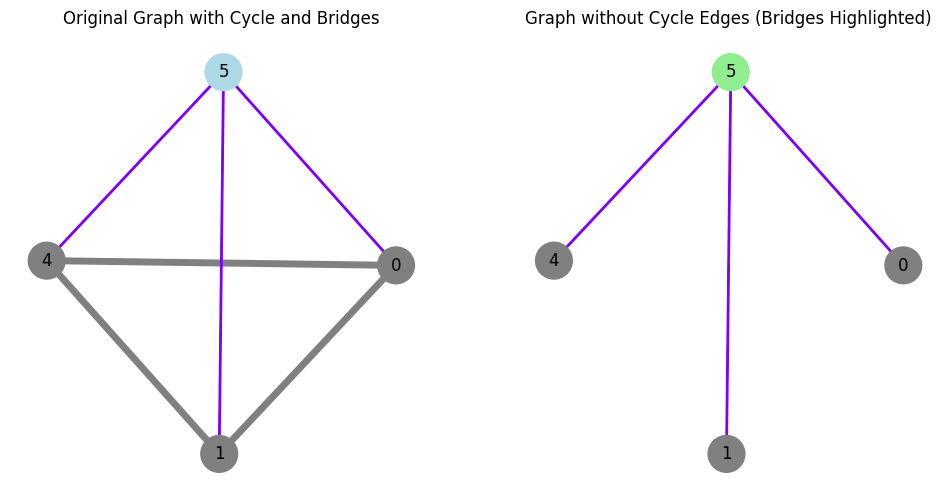

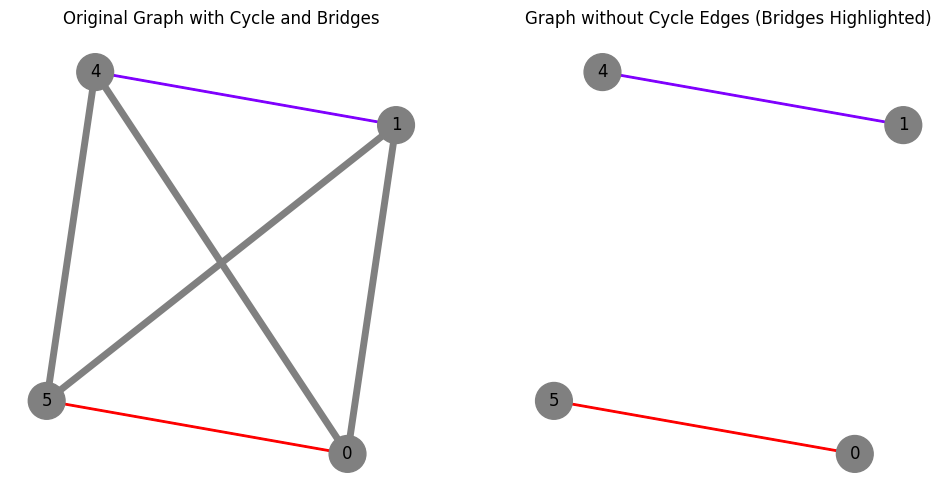

--------------------------------------------------------------------------------------------------------------------------------------------




In [7]:
def get_graph_tcc(tcc_list, G):
    tcc = G.subgraph(tcc_list["node_list"]).copy()
    # Add virtual edges to each tcc
    tcc.add_edges_from(tcc_list["virtual_edges"])
    return tcc

def draw_graph(G, title="Graph"):
    pos = nx.spring_layout(G)  # or use nx.planar_layout(G) for planar graphs
    nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray')
    plt.title(title)
    plt.show()


tcc_printer.print_n_connected_components(G, info["TCCs"], N=3, name="Triconnected components" )

for i, tcc_list in enumerate(info["TCCs"]):
    tcc = get_graph_tcc(tcc_list, G)
    print(len(info["planarity_info"]))
    tcc_info = info["planarity_info"][i]
    draw_graph(tcc, title="Triconnected component with nodes " + str(tcc.nodes()) )
    printer.print_spanning_tree(tcc, tcc_info["spanning_tree"])
    printer.print_bridges(tcc, tcc_info["bridges"])
    # printers.Printer.print_cycle_edge_table(tcc_info["truth_assign"], tcc_info["edge_index_map"], tcc_info["cycle_index_map"])
    # printers.Printer.print_B_matrix(tcc_info["A1"], "A1 matrix")
    # printers.Printer.print_B_matrix(tcc_info["B1"], "B1 matrix") ### TODO CHECKEAR ESTOS
    print("--------------------------------------------------------------------------------------------------------------------------------------------")
    print()
    print()

In [8]:
print(info)

{'relation_T': [[(0, 1, 2), (0, 1, 3), (0, 1, 4), (0, 1, 5), (0, 2, 3), (0, 2, 6), (0, 2, 7), (0, 3, 8), (0, 3, 9), (0, 4, 5), (0, 6, 7), (0, 8, 9), (1, 2, 3), (1, 2, 10), (1, 2, 11), (1, 3, 14), (1, 4, 5), (1, 10, 11), (1, 14, 15), (2, 3, 12), (2, 3, 13), (2, 6, 7), (2, 10, 11), (2, 12, 13), (3, 8, 9), (3, 12, 13)]], 'relation_R': [[[True, True, True, True, True, True, True, True, True, True, False, False, False, False, False, False], [True, True, True, True, True, True, False, False, False, False, True, True, False, False, True, True], [True, True, True, True, False, False, True, True, False, False, True, True, True, True, False, False], [True, True, True, True, False, False, False, False, True, True, False, False, True, True, True, False], [True, True, False, False, True, True, False, False, False, False, False, False, False, False, False, False], [True, True, False, False, True, True, False, False, False, False, False, False, False, False, False, False], [True, False, True, False, 

In [9]:
print(info["planarity_info"])

[{'A1': [[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0], [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0], [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], [